In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)
# tf.config.list_physical_devices('GPU')

2.18.0


# KOSIS 현재 흡연률 2024

In [268]:
# smoking_rate = pd.read_csv('KOSIS/file/KOSIS2_현재_흡연률_일반담배_궐련_현재사용률_2024.csv')
# smoking_rate = smoking_rate[['연도', '응답자특성별(1)', '응답자특성별(2)', '분석대상자수(명)', '표준오차', '흡연율', '성별']]

In [269]:
# smoking_rate = smoking_rate[['연도', '성별' ,'응답자특성별(1)', '응답자특성별(2)', '분석대상자수(명)', '표준오차', '흡연율']]

In [14]:
# smoking_rate

In [52]:
# smoking_rate_X = smoking_rate.iloc[:, :-1].to_numpy()
# smoking_rate_y = smoking_rate.iloc[:, -1]

In [53]:
# smoking_rate_Y = pd.get_dummies(smoking_rate_y).values

In [54]:
# le = LabelEncoder()
# smoking_rate_X[:, 0] = le.fit_transform(smoking_rate_X[:, 0])
# smoking_rate_X[:, 1] = le.fit_transform(smoking_rate_X[:, 1])
# smoking_rate_X[:, 2] = le.fit_transform(smoking_rate_X[:, 2])
# # smoking_rate_X[:, 3] = le.fit_transform(smoking_rate_X[:, 3])

In [55]:
# smoking_rate_X

In [57]:
# X_train, X_test, Y_train, Y_test = train_test_split(smoking_rate_X, smoking_rate_Y,
#                                                     test_size=0.2,
#                                                     # stratify=smoking_rate_Y,
#                                                     random_state=4)
# X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [58]:
# X_train = X_train.astype('float32')
# Y_train = Y_train.astype('float32')
# X_test = X_test.astype('float32')
# Y_test = Y_test.astype('float32')

In [59]:
# pd.Series(np.argmax(Y_train, axis=1)).value_counts()

In [60]:
# pd.Series(np.argmax(Y_test, axis=1)).value_counts()

In [61]:
# model = Sequential()
# model.add(Input(shape=(6,)))
# model.add(Dense(units=512, input_dim=4, activation='relu'))
# model.add(Dense(units=256, input_dim=4, activation='relu'))
# model.add(Dense(units=128, input_dim=4, activation='relu'))
# model.add(Dense(units=3, input_dim=4,   activation='softmax'))
# print(model.summary())

In [62]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# earlystopping = EarlyStopping(patience=100, monitor='val_loss')

In [64]:
# hist = model.fit(X_train, Y_train,
#                  epochs=500,
#                  validation_split=0.2,
#                  # callbacks=earlystopping
#                 )

In [65]:
# fig, loss_ax = plt.subplots(figsize=(12, 5))
# loss_ax.plot(hist.history['loss'], 'r', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='validation loss')
# loss_ax.set_xlabel('epoch')
# loss_ax.set_ylabel('loss')

# acc_ax = loss_ax.twinx()
# acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
# acc_ax.plot(hist.history['val_accuracy'], 'b', label='validation accuracy')
# acc_ax.set_ylabel('accuracy')
# loss_ax.legend(loc='center right')
# acc_ax.legend(bbox_to_anchor=(0.786, 0.7))
# plt.show()

In [66]:
# model.evaluate(X_test, Y_test)

In [67]:
# real = np.argmax(Y_test, axis=1)
# pred = np.argmax(model.predict(X_test), axis=1)
# ctab = pd.crosstab(real, pred)
# # ctab.columns = list(smoking_rate['성별'])
# # ctab.columns.name = '성별'
# # ctab.index = smoking_rate['성별']
# # ctab.index.name = 'real'
# ctab

# data_go_kr 서울시 금연구역 정보

In [93]:
nonsmoking_area = pd.read_csv('data_go_kr/file/seoul_nonsmoking_area.csv')

In [97]:
# nonsmoking_area['금연구역_지정여부'] = nonsmoking_area['금연구역구분']
nonsmoking_area_X = nonsmoking_area[['시군구명', '금연구역범위상세', '위도', '경도']]
nonsmoking_area_y = nonsmoking_area['금연구역구분']

nonsmoking_area_Y = pd.get_dummies(nonsmoking_area_y).values

le = LabelEncoder()
nonsmoking_area_X.loc[:, '시군구명'] = le.fit_transform(nonsmoking_area_X.loc[:, '시군구명'])
nonsmoking_area_X.loc[:, '금연구역범위상세'] = le.fit_transform(nonsmoking_area_X.loc[:, '금연구역범위상세'])
nonsmoking_area_y = le.fit_transform(nonsmoking_area_y)

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(nonsmoking_area_X, nonsmoking_area_Y,
                                                    test_size=0.2,
                                                    # stratify=smoking_rate_Y,
                                                    random_state=4)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7967, 4), (7967, 62), (1992, 4), (1992, 62))

In [100]:
# X_train = X_train.astype('float32')
# Y_train = Y_train.astype('float32')
# X_test = X_test.astype('float32')
# Y_test = Y_test.astype('float32')

In [101]:
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

42    3199
26     798
60     702
37     506
32     310
27     252
31     238
34     209
23     208
43     156
22     126
30     117
29      97
52      74
9       64
18      57
28      54
38      54
19      50
35      47
5       45
2       44
59      42
41      39
44      38
0       37
10      36
55      36
45      34
3       33
61      29
16      28
14      26
54      20
11      16
1       13
7       13
47      13
15      13
50      11
21      10
36      10
6       10
49       9
20       7
4        7
17       6
8        4
57       4
56       3
33       2
12       2
53       2
24       1
25       1
39       1
51       1
46       1
40       1
13       1
Name: count, dtype: int64

In [102]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

42    840
26    197
60    172
37    111
27     68
23     65
32     64
34     55
31     54
30     31
29     27
43     24
22     23
35     18
52     18
38     16
19     16
41     13
44     11
3      11
9      10
2      10
5      10
45     10
1       8
10      8
28      8
0       8
21      7
61      7
18      7
14      7
11      6
55      6
59      5
15      5
54      4
16      3
47      3
49      3
6       3
17      3
7       3
36      3
50      2
58      1
51      1
8       1
20      1
33      1
12      1
48      1
57      1
4       1
Name: count, dtype: int64

In [103]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(units=512, input_dim=4, activation='relu'))
model.add(Dense(units=256, input_dim=4, activation='relu'))
model.add(Dense(units=128, input_dim=4, activation='relu'))
model.add(Dense(units=62, input_dim=4,   activation='softmax'))
print(model.summary())

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,782 (682.74 KB)

 Trainable params: 174,782 (682.74 KB)

 Non-trainable params: 0 (0.00 B)

None


In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
earlystopping = EarlyStopping(patience=100, monitor='val_loss')

In [106]:
hist = model.fit(X_train, Y_train,
                 epochs=500,
                 validation_split=0.2,
                 callbacks=earlystopping
                )

Epoch 1/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4395 - loss: 3.0095 - val_accuracy: 0.5100 - val_loss: 1.8759
Epoch 2/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 1.6890 - val_accuracy: 0.5935 - val_loss: 1.5513
Epoch 3/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5869 - loss: 1.5005 - val_accuracy: 0.5935 - val_loss: 1.4515
Epoch 4/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6148 - loss: 1.3923 - val_accuracy: 0.6060 - val_loss: 1.4229
Epoch 5/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6149 - loss: 1.3484 - val_accuracy: 0.6248 - val_loss: 1.3603
Epoch 6/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6301 - loss: 1.3120 - val_accuracy: 0.6060 - val_loss: 1.3647
Epoch 7/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6369 - loss: 1.2492 - val_accuracy: 0.6286 - val_loss: 1.3140
Epoch 8/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6655 - loss: 1.1729 - val_accu

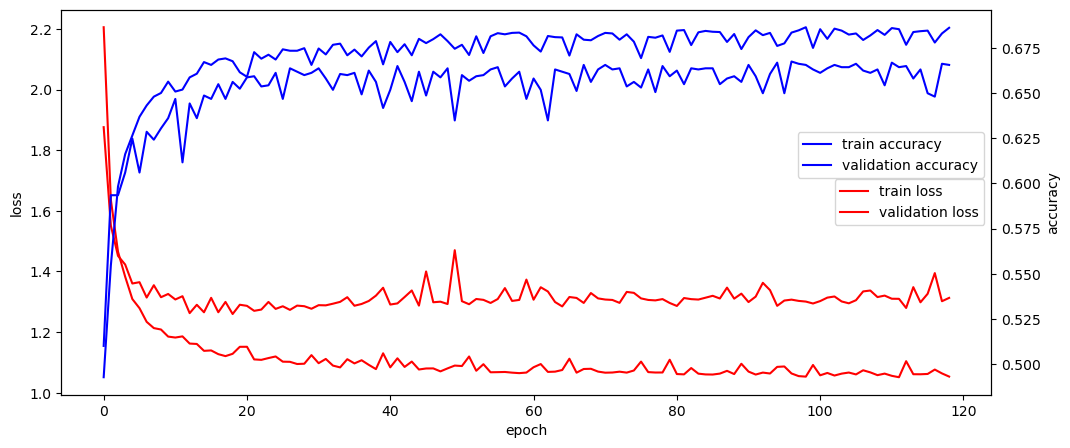

In [107]:
fig, loss_ax = plt.subplots(figsize=(12, 5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [108]:
# 모델 평가하기 
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy*100, '%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.6961 - loss: 1.1301
68.47389340400696 %


In [110]:
model.evaluate(X_test, Y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.6961 - loss: 1.1301


[1.1653859615325928, 0.6847389340400696]

In [111]:
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
# ctab.columns = list(smoking_rate['성별'])
# ctab.columns.name = '성별'
# ctab.index = smoking_rate['성별']
# ctab.index.name = 'real'
ctab

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


col_0,0,1,2,3,9,10,12,15,16,17,...,44,45,49,50,52,54,55,57,59,61
row_0,,,,,,,,,,,,,,,,,,,,,
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,2,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,6,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,2,3,0,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# data_go_kr 흡연 단속 내역

In [62]:
mapo = pd.read_csv('data_go_kr/file/smoking_control_byDistrict_mapogu.csv')
jungnang = pd.read_csv('data_go_kr/file/smoking_control_byDistrict_jungnanggu.csv')
yangcheon = pd.read_csv('data_go_kr/file/smoking_control_byDistrict_yangcheongu.csv')
yangcheon = yangcheon.iloc[:, :4]
songpa = pd.read_csv('data_go_kr/file/smoking_control_byDistrict_songpagu.csv')
dongjak = pd.read_csv('data_go_kr/file/smoking_control_byDistrict_dongjakgu.csv')
dongjak = dongjak.loc[4:, ['연도', '자치구명', '흡연민원건수', '흡연단속건수']]
gwanak = pd.read_csv('data_go_kr/file/smoking_control_byDistrict_gwanakgu.csv')
gwanak = gwanak.loc[:, ['연도', '자치구명', '흡연민원건수', '흡연단속건수']]

In [63]:
smoking_control_byDistrict = pd.concat([mapo, jungnang, yangcheon, songpa, dongjak, gwanak])
smoking_control_byDistrict = smoking_control_byDistrict[['연도', '자치구명', '흡연단속건수', '흡연민원건수']]

In [64]:
smoking_control_byDistrict

,연도,자치구명,흡연단속건수,흡연민원건수
0,2012,마포구,9,234
1,2013,마포구,7,546
2,2014,마포구,774,829
3,2015,마포구,387,988
4,2016,마포구,362,685
...,...,...,...,...
7,2019,관악구,573,702
8,2020,관악구,305,868
9,2021,관악구,239,1442
10,2022,관악구,266,739


In [65]:
smoking_control_byDistrict_X = smoking_control_byDistrict.iloc[:, :-1].to_numpy()
smoking_control_byDistrict_y = smoking_control_byDistrict.iloc[:, -1]

In [66]:
smoking_control_byDistrict_Y = pd.get_dummies(smoking_control_byDistrict_y).values

In [67]:
# X 데이터에서 텍스트 컬럼(문자열)을 수치형으로 변환
le = LabelEncoder()
smoking_control_byDistrict_X[:, 1] = le.fit_transform(smoking_control_byDistrict_X[:, 1])

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(smoking_control_byDistrict_X, smoking_control_byDistrict_Y,
                                                    test_size=0.2,
                                                    # stratify=smoking_control_byDistrict_Y,
                                                    random_state=4)

In [69]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((53, 3), (53, 66), (14, 3), (14, 66))

In [70]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

In [71]:
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

24    1
43    1
29    1
56    1
44    1
34    1
8     1
48    1
62    1
55    1
1     1
30    1
47    1
46    1
20    1
5     1
60    1
58    1
57    1
22    1
59    1
9     1
64    1
27    1
12    1
0     1
39    1
61    1
41    1
51    1
52    1
15    1
19    1
10    1
17    1
28    1
16    1
42    1
45    1
21    1
18    1
7     1
35    1
38    1
25    1
6     1
14    1
13    1
2     1
26    1
37    1
65    1
4     1
Name: count, dtype: int64

In [72]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

33    2
31    1
54    1
23    1
49    1
36    1
63    1
3     1
50    1
40    1
32    1
11    1
53    1
Name: count, dtype: int64

In [73]:
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(units=512, input_dim=4, activation='relu'))
Dropout(0.2)
model.add(Dense(units=256, input_dim=4, activation='relu'))
Dropout(0.2)
model.add(Dense(units=128, input_dim=4, activation='relu'))
Dropout(0.2)
model.add(Dense(units=66, input_dim=4,   activation='softmax'))
print(model.summary())

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 66)             │         8,514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,786 (682.76 KB)

 Trainable params: 174,786 (682.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
hist = model.fit(X_train, Y_train,
                 epochs=500,
                 validation_split=0.2,
                 callbacks=earlystopping
                )

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.0263 - loss: 133.0242 - val_accuracy: 0.0000e+00 - val_loss: 151.6677
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0159 - loss: 102.6180 - val_accuracy: 0.0000e+00 - val_loss: 111.1343
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0422 - loss: 80.5439 - val_accuracy: 0.0000e+00 - val_loss: 116.3835
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 73.6899 - val_accuracy: 0.0000e+00 - val_loss: 116.7904
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0263 - loss: 63.1277 - val_accuracy: 0.0000e+00 - val_loss: 103.4004
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0526 - loss: 48.4198 - val_accuracy: 0.0000e+00 - val_loss: 95.6028
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0685 - loss: 44.7456 - val_accuracy: 0.0000e+00 - val_loss: 93.2308
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0

In [76]:
# 모델 평가하기 
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy*100, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 80.6549
0.0 %


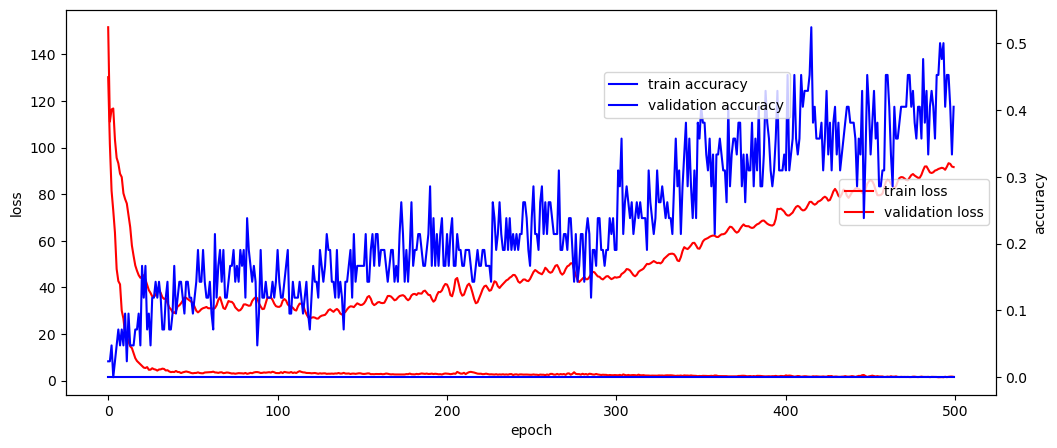

In [77]:
fig, loss_ax = plt.subplots(figsize=(12, 5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.786, 0.7))
plt.show()

In [78]:
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 80.6549


[80.6549072265625, 0.0]

In [79]:
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
# ctab.columns = list(smoking_rate['성별'])
# ctab.columns.name = '성별'
# ctab.index = smoking_rate['성별']
# ctab.index.name = 'real'
ctab

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


col_0,10,17,21,30,37,46,52,61,65
row_0,,,,,,,,,
3,0,0,0,0,0,0,0,1,0
11,0,0,1,0,0,0,0,0,0
23,1,0,0,0,0,0,0,0,0
31,0,0,0,0,1,0,0,0,0
32,0,0,0,0,0,0,1,0,0
33,0,0,0,0,1,0,0,1,0
36,0,0,0,1,0,0,0,0,0
40,0,1,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,1
